<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/5.%20Object%20Detection%20with%20OpenCV%20and%20Python/9_ObjectDetection_OpenCV_FaceDetection_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection with OpenCV and Python

In this section, we will cover the <b> Face Detection :</b> (Using Viola-Jones Algorithm with Haar Cascades)

**Face Detection is NOT Face Recognition**

- In 2001, Paul Viola and Michael Jones published their idea of face detection with the concept of few key features.
- Also, pre-computing of integral image to save time on calculations

<b> Main Features :</b>

- <b> Edge features: </b> vertical or horizontal (one edge either black or white)
- <b> Line features: </b> vertical or horizontal (one either black or white in the middle
- <b> Four-rectangle Features: </b> Diagonal

- Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle. Realistic point of view, our images won't be perfect edges or lines.
- So features are calculated by:
   
      mean(dark region) - mean(light region)
- <b> Closer we are to 1, better is the feature </b>
- Calculating ths ums of entire image will be computationaly expensive. Voila-Jones algorithm solves this by using intergral image.
- <b> Integral Image: </b> Summed area table
- Algorithm saves time by going through a cascade of classifers
  - Front Face
  - Gray scale
  - Search for Haar Cascade Features (to check whether we face face or not)
   - Edge feature indicating eyes and cheeks
   - If passed, we search for the next feature, such as bridge of the nose.
   - Then we continue through this cascade until the algorithm says that it detected the face.
- Downside --> Algorithm needs large datsets needed to create own features



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

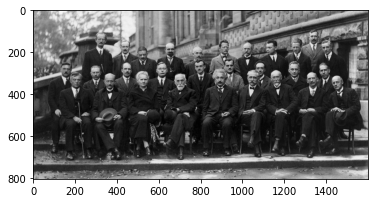

In [2]:
#upload 3 images and in gray scale

nadia = cv2.imread('Nadia_Murad.jpg',0)
denis = cv2.imread('Denis_Mukwege.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)

plt.imshow(solvay,cmap='gray')

In [3]:
# Pre-trained XML Haarcascade files

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def detect_face(img):

  face_img = img.copy()
  face_rects = face_cascade.detectMultiScale(face_img)

  for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  
  return face_img

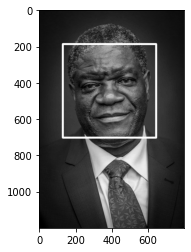

In [5]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

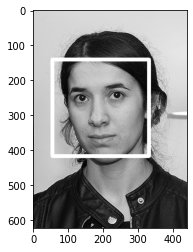

In [6]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

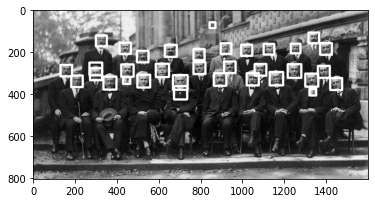

In [7]:
#for conference

result = detect_face(solvay)
plt.imshow(result,cmap='gray')

For multiple faces in one iamge, either it is detecting double faces or something which is not there as face, so we will add few parameters here.


In [8]:
#scale factor and minimum neighbours
'''
@param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
@param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
to retain it.
'''
def adj_detect_face(img):

  face_img = img.copy()
  face_rects = face_cascade.detectMultiScale(face_img,
                                             scaleFactor=1.2,
                                             minNeighbors=5)

  for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  
  return face_img

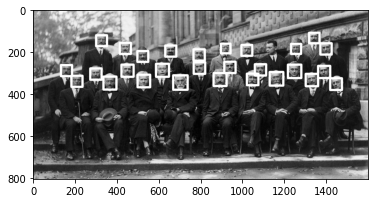

In [9]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

Now it is detecting faces better except the one that is not looking here

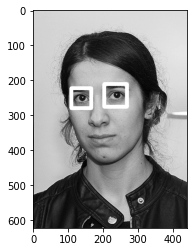

In [10]:
#Checking EYE CASCADE FILE

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

def detect_eyes(img):

  face_img = img.copy()
  eyes_rects = eye_cascade.detectMultiScale(face_img)

  for (x,y,w,h) in eyes_rects:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
  
  return face_img

result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

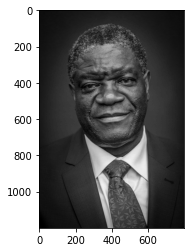

In [11]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

No detection as the his eyes are almost same as dark which also shows that if photo is editted this detection won't work.



---

To capture face detection in video , please see .py script file
